# Assignment
---
Read about (Susanna Epp pp. 704):
1. Kruskal's Algorithm
2. Prim's Algorithm
3. Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithm in Python.

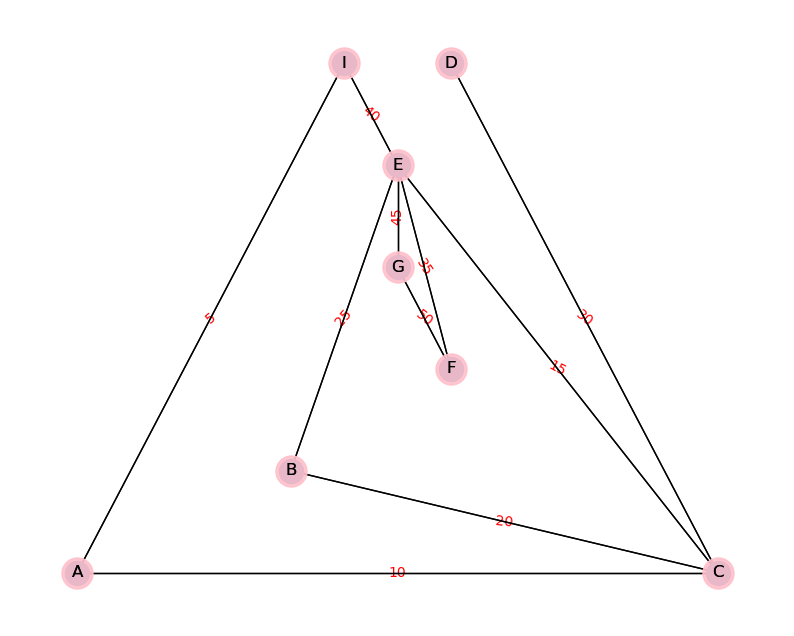

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

$\textbf{1. Kruskal's Algorithm}$

To implement Kruskal's Algorithm for the given graph, we need to follow these steps:

1. Sort all the edges of the graph in non-decreasing order of their weights.
2. Initialize an empty set to store the minimum spanning tree (MST) edges.
3. Iterate through the sorted edges. For each edge:
    - If adding the edge to the MST does not form a cycle, add it to the MST.
    - Use a disjoint-set data structure (Union-Find) to check for cycles.
4. Return the set of MST edges.

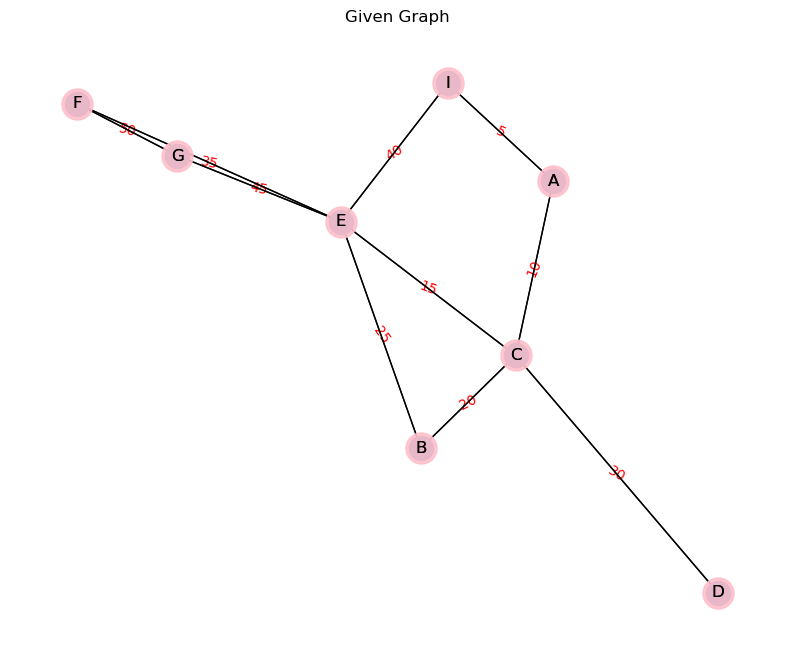

Edges of Minimum Spanning Tree (Kruskal's Algorithm): [('E', 'F'), ('C', 'D'), ('B', 'E'), ('C', 'E'), ('E', 'G'), ('E', 'I'), ('A', 'I')]


In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Define Kruskal's Algorithm
def kruskal_algorithm(graph):
    # Initialize an empty list to store the edges of the minimum spanning tree
    mst_edges = []
    
    # Sort all the edges in the graph based on their weights
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])
    
    # Initialize a disjoint set data structure to keep track of connected components
    parent = {node: node for node in graph.nodes()}
    
    # Define a function to find the root of a given node
    def find(node):
        while parent[node] != node:
            parent[node] = parent[parent[node]]
            node = parent[node]
        return node
    
    # Define a function to perform union of two components
    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        parent[root1] = root2
    
    # Iterate through all edges in sorted order
    for edge in edges:
        # Get the nodes and weight of the current edge
        node1, node2, weight = edge
        
        # Check if including this edge forms a cycle
        if find(node1) != find(node2):
            # If not, add it to the minimum spanning tree
            mst_edges.append((node1, node2))
            # Perform union of the two components
            union(node1, node2)
    
    return mst_edges

# Given graph
G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C"), ("A", "I"), ("C", "B"), ("C", "E"), ("C", "D"),
            ("B", "E"), ("I", "E"), ("E", "F"), ("F", "G"), ("G", "E")]

# Add edges with their weights
for edge in edgelist:
    G.add_edge(edge[0], edge[1], weight=random.randint(1, 100))
    
# Positions for all nodes
pos = nx.spring_layout(G, seed=55)

# Draw the edges with their weights
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15,
                 ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35,
                 ("F", "G"): 50, ("G", "E"): 45},
    font_color='red'
)

# Draw the graph with nodes and edges
nx.draw(G, pos=pos, with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)

plt.title('Given Graph')
plt.show()

# Apply Kruskal's Algorithm
mst_edges = kruskal_algorithm(G)
print("Edges of Minimum Spanning Tree (Kruskal's Algorithm):", mst_edges)

$\textbf{2. Prim's Algorithm}$

To implement Prim's Algorithm for the given graph, we need to follow these steps:

1. Choose an arbitrary vertex as the starting vertex.
2. Initialize an empty set to store the vertices of the minimum spanning tree (MST).
3. Initialize a priority queue to store the edges and their weights.
4. Add all the edges incident to the starting vertex to the priority queue.
5. While the priority queue is not empty and the MST does not include all vertices:
    - Remove the edge with the minimum weight from the priority queue.
    - If adding this edge to the MST does not form a cycle, add it to the MST and update the priority queue with new edges.
6. Return the set of MST edges.

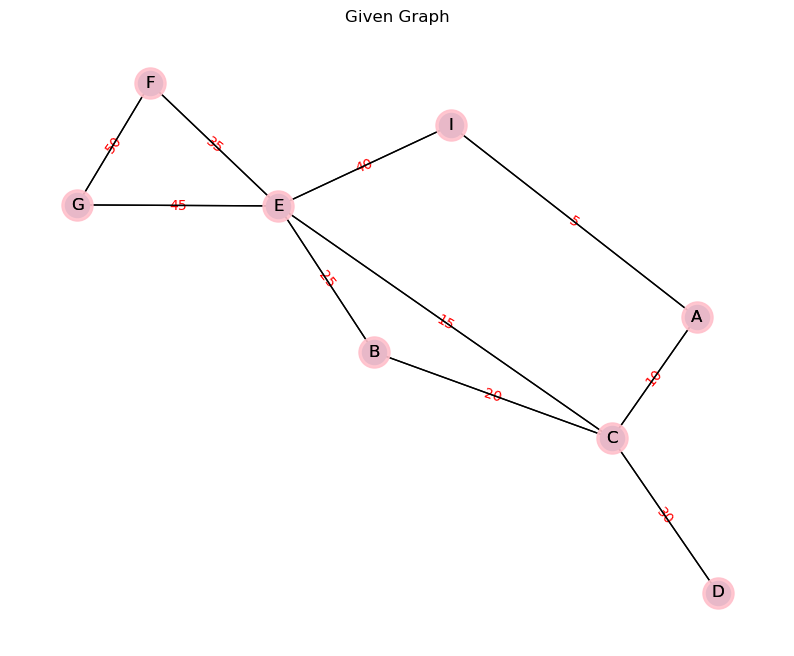

Edges of Minimum Spanning Tree (Prim's Algorithm): [('A', 'I'), ('I', 'A'), ('I', 'E'), ('E', 'C'), ('C', 'B'), ('E', 'G'), ('G', 'F'), ('C', 'D')]


In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Define Prim's Algorithm
def prim_algorithm(graph):
    # Choose an arbitrary starting vertex
    start_vertex = list(graph.nodes())[0]
    # Initialize an empty set to store the vertices of the minimum spanning tree
    mst_vertices = {start_vertex}
    # Initialize a priority queue to store the edges and their weights
    pq = []
    # Initialize a set to keep track of visited vertices
    visited = set()
    # Initialize a list to store the minimum spanning tree edges
    mst_edges = []
    
    # Add all edges incident to the starting vertex to the priority queue
    for neighbor, weight in graph[start_vertex].items():
        heapq.heappush(pq, (weight['weight'], start_vertex, neighbor))
    
    # Iterate until all vertices are visited or priority queue is empty
    while pq and len(mst_vertices) < len(graph.nodes()):
        # Remove the edge with the minimum weight
        weight, source, target = heapq.heappop(pq)
        
        # Check if the target vertex is already visited
        if target not in visited:
            # Add the target vertex to the MST
            mst_vertices.add(target)
            # Add the edge to the MST
            mst_edges.append((source, target))
            # Add all edges incident to the target vertex to the priority queue
            for neighbor, weight in graph[target].items():
                if neighbor not in visited:
                    heapq.heappush(pq, (weight['weight'], target, neighbor))
            
            # Mark the target vertex as visited
            visited.add(target)
    
    return mst_edges

# Given graph
G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C"), ("A", "I"), ("C", "B"), ("C", "E"), ("C", "D"),
            ("B", "E"), ("I", "E"), ("E", "F"), ("F", "G"), ("G", "E")]

# Add edges with their weights
for edge in edgelist:
    G.add_edge(edge[0], edge[1], weight=random.randint(1, 100))

# Positions for all nodes
pos = nx.spring_layout(G, seed=55)

# Draw the edges with their weights
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15,
                 ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35,
                 ("F", "G"): 50, ("G", "E"): 45},
    font_color='red'
)

# Draw the graph with nodes and edges
nx.draw(G, pos=pos, with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)

plt.title("Given Graph")
plt.show()

# Apply Prim's Algorithm
mst_edges = prim_algorithm(G)
print("Edges of Minimum Spanning Tree (Prim's Algorithm):", mst_edges)


$\textbf{3. Djitraka's Shortest Path Algorithm}$

To implement Dijkstra's Shortest Path Algorithm for the given graph, we need to follow these steps:

1. Initialize a dictionary to store the distances from the source vertex to all other vertices. Initially, set the distance of the source vertex to 0 and the distance of all other vertices to infinity.
2. Initialize a priority queue to store vertices and their corresponding distances from the source vertex.
3. While the priority queue is not empty:
    - Remove the vertex with the smallest distance from the priority queue.
    - For each neighbor of this vertex:
        - Calculate the distance to the neighbor through the current vertex.
        - If this distance is smaller than the previously recorded distance, update the distance and enqueue the neighbor.
4. Return the dictionary of distances.

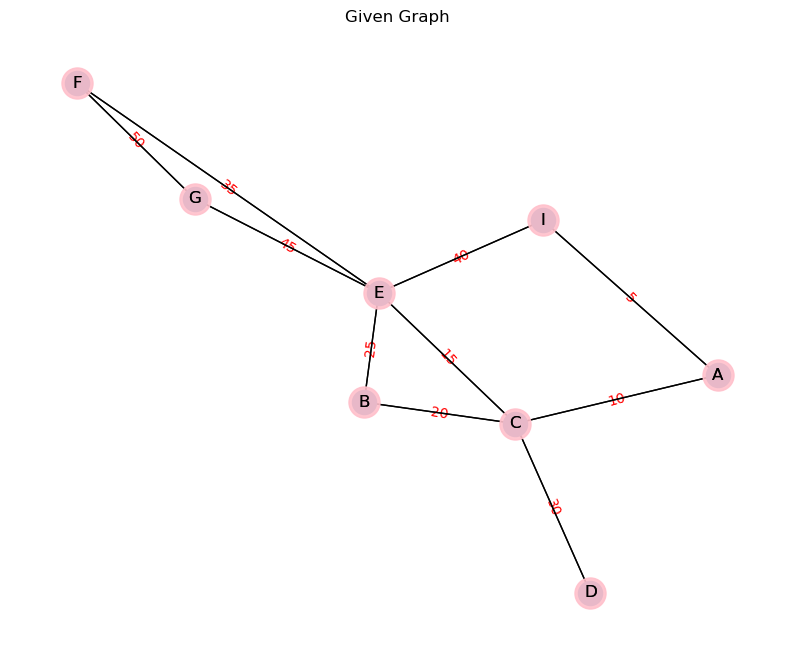

Shortest Paths from vertex A: {'A': 0, 'B': 155, 'C': 57, 'D': 111, 'E': 99, 'F': 113, 'G': 136, 'I': 16}


In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Define Dijkstra's Shortest Path Algorithm
def dijkstra_shortest_path(graph, source):
    # Initialize distances dictionary
    distances = {node: float('inf') for node in graph.nodes()}
    distances[source] = 0
    
    # Initialize priority queue
    pq = [(0, source)]
    
    # While priority queue is not empty
    while pq:
        # Remove vertex with smallest distance
        distance, current_node = heapq.heappop(pq)
        
        # For each neighbor of current node
        for neighbor, edge_attr in graph[current_node].items():
            # Calculate new distance
            new_distance = distance + edge_attr['weight']
            
            # If new distance is smaller, update distance and enqueue neighbor
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                heapq.heappush(pq, (new_distance, neighbor))
    
    return distances

# Given graph
G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C"), ("A", "I"), ("C", "B"), ("C", "E"), ("C", "D"),
            ("B", "E"), ("I", "E"), ("E", "F"), ("F", "G"), ("G", "E")]

# Add edges with their weights
for edge in edgelist:
    G.add_edge(edge[0], edge[1], weight=random.randint(1, 100))

# Positions for all nodes
pos = nx.spring_layout(G, seed=55)

# Draw the edges with their weights
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15,
                 ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35,
                 ("F", "G"): 50, ("G", "E"): 45},
    font_color='red'
)

# Draw the graph with nodes and edges
nx.draw(G, pos=pos, with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)

plt.title("Given Graph")
plt.show()

# Apply Dijkstra's Shortest Path Algorithm from vertex 'A'
source_vertex = 'A'
shortest_paths = dijkstra_shortest_path(G, source_vertex)
print("Shortest Paths from vertex", source_vertex + ":", shortest_paths)
